In [70]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [71]:
def get_spotify_data(api, endpoint, params=None):
    response = api._get(endpoint, payload=params)
    return response

def fetch_playlist_info(sp, playlist_id):
    playlist_info = sp.playlist(playlist_id)
    return playlist_info

def fetch_track_info(sp, track_id):
    track_info = sp.track(track_id)
    return track_info

def fetch_audio_features(sp, track_id):
    audio_features = sp.audio_features(track_id)[0]
    return audio_features

def create_track_dataframe(tracks):
    track_data = []
    for track in tracks:
        track_id = track['track']['id']
        track_info = fetch_track_info(sp, track_id)
        audio_features = fetch_audio_features(sp, track_id)

        track_data.append({
            'track_id': track_id,
            'artists': ', '.join([artist['name'] for artist in track_info['artists']]),
            'album_name': track_info['album']['name'],
            'track_name': track_info['name'],
            'popularity': track_info['popularity'],
            'duration_ms': track_info['duration_ms'],
            'explicit': track_info['explicit'],
            'danceability': audio_features['danceability'],
            'energy': audio_features['energy'],
            'key': audio_features['key'],
            'loudness': audio_features['loudness'],
            'mode': audio_features['mode'],
            'speechiness': audio_features['speechiness'],
            'acousticness': audio_features['acousticness'],
            'instrumentalness': audio_features['instrumentalness'],
            'liveness': audio_features['liveness'],
            'valence': audio_features['valence'],
            'tempo': audio_features['tempo'],
            'time_signature': audio_features['time_signature'],
            
        })

    return pd.DataFrame(track_data)

def save_to_csv(data, filename):
    data.to_csv(filename, index=False)

if __name__ == "__main__":
    # Set up Spotify API credentials
    client_id = '4086f056dab84c348188926ae7bda3ec'
    client_secret = '18032b41aa3347a3882ca336425868f8'
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # Example: Fetching information for a playlist
    playlist_id = input('Enter your playlist')
    playlist_info = fetch_playlist_info(sp, playlist_id)
    playlist_tracks = playlist_info['tracks']['items']

    # Example: Creating a DataFrame with track information
    track_dataframe = create_track_dataframe(playlist_tracks)

    # Example: Save DataFrame to CSV
    save_to_csv(track_dataframe, 'playlist_tracks_info1.csv')



Enter your playlist2O5Z4LSwxQq2PCd8ZuR0xD


In [72]:
original_data = pd.read_csv('playlist_tracks_info.csv')

In [73]:
original_data.head(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",61,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.2520,117.202,4
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",60,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.6090,127.087,4
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",53,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.8210,105.063,4
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",73,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.8100,123.021,4
4,1k3i030OvSLAjHf4wv4pf2,Siddhant Goenka,Farishtey,Farishtey,39,201882,False,0.336,0.486,7,-10.336,1,0.0408,0.0809,0.000022,0.5660,0.1020,169.862,4
5,3iFYJMrRS0fLrwDNVbqNF0,Darshan Raval,Saajan Ve,Saajan Ve,76,171473,False,0.712,0.675,3,-5.440,1,0.0923,0.1210,0.000012,0.0955,0.5450,95.000,4
6,3eTle4C3yd6Ulxyky2YvmW,Indrasish Ghosh,Shayed,Shayed,31,306875,False,0.554,0.540,2,-6.887,1,0.0277,0.4390,0.000017,0.0830,0.4110,143.876,4
7,1IkXYHxLkXfhLPLv7lukJz,Siddhant Goenka,Jazbaat,Jazbaat,33,202636,False,0.556,0.362,8,-11.463,1,0.0335,0.4250,0.000000,0.3770,0.0886,111.203,4
8,23YpzkTDtU78GK6vpgRbkM,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Ishq Jaisa Kuch (From ""Fighter"")","Ishq Jaisa Kuch (From ""Fighter"")",76,169686,False,0.736,0.697,1,-7.672,0,0.0416,0.1150,0.000015,0.1490,0.3860,104.974,4
9,6UlpuzN1E4p9H2hTon4YsD,Satbir Aulakh,Sawariya,Sawariya,40,255468,False,0.653,0.792,1,-4.998,1,0.0801,0.0350,0.000000,0.3320,0.3280,128.073,4


In [74]:
original_data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,46.420000,203616.130000,0.585630,0.529000,4.75000,-8.690060,0.610000,0.054381,0.475998,0.015272,0.156859,0.457996,117.022810,3.890000
std,18.647273,50936.320759,0.144337,0.174798,3.56009,2.670807,0.490207,0.048716,0.271934,0.086727,0.109251,0.210767,29.542936,0.423907
min,1.000000,60957.000000,0.172000,0.117000,0.00000,-15.328000,0.000000,0.025400,0.008850,0.000000,0.060000,0.088600,74.052000,1.000000
25%,29.750000,168661.750000,0.485500,0.412500,1.00000,-10.697750,0.000000,0.031750,0.257500,0.000000,0.090975,0.301250,95.004500,4.000000
50%,46.000000,201511.500000,0.577000,0.535000,4.50000,-8.271500,1.000000,0.037200,0.462000,0.000003,0.118000,0.423500,111.563500,4.000000
75%,60.000000,240470.750000,0.684500,0.652250,8.00000,-6.731000,1.000000,0.053775,0.702750,0.000183,0.177250,0.611000,134.965500,4.000000
max,85.000000,313170.000000,0.880000,0.884000,11.00000,-2.599000,1.000000,0.336000,0.930000,0.748000,0.665000,0.963000,200.185000,5.000000


In [75]:
original_data.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [76]:
original_data.drop('track_id',axis=1,inplace=True)

In [91]:
original_data.head(15)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",61,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.2520,117.202,4
1,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",60,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.6090,127.087,4
2,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",53,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.8210,105.063,4
3,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",73,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.8100,123.021,4
4,Siddhant Goenka,Farishtey,Farishtey,39,201882,False,0.336,0.486,7,-10.336,1,0.0408,0.0809,0.000022,0.5660,0.1020,169.862,4
5,Darshan Raval,Saajan Ve,Saajan Ve,76,171473,False,0.712,0.675,3,-5.440,1,0.0923,0.1210,0.000012,0.0955,0.5450,95.000,4
6,Indrasish Ghosh,Shayed,Shayed,31,306875,False,0.554,0.540,2,-6.887,1,0.0277,0.4390,0.000017,0.0830,0.4110,143.876,4
7,Siddhant Goenka,Jazbaat,Jazbaat,33,202636,False,0.556,0.362,8,-11.463,1,0.0335,0.4250,0.000000,0.3770,0.0886,111.203,4
8,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Ishq Jaisa Kuch (From ""Fighter"")","Ishq Jaisa Kuch (From ""Fighter"")",76,169686,False,0.736,0.697,1,-7.672,0,0.0416,0.1150,0.000015,0.1490,0.3860,104.974,4
9,Satbir Aulakh,Sawariya,Sawariya,40,255468,False,0.653,0.792,1,-4.998,1,0.0801,0.0350,0.000000,0.3320,0.3280,128.073,4


In [78]:
original_data.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [79]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           100 non-null    object 
 1   album_name        100 non-null    object 
 2   track_name        100 non-null    object 
 3   popularity        100 non-null    int64  
 4   duration_ms       100 non-null    int64  
 5   explicit          100 non-null    bool   
 6   danceability      100 non-null    float64
 7   energy            100 non-null    float64
 8   key               100 non-null    int64  
 9   loudness          100 non-null    float64
 10  mode              100 non-null    int64  
 11  speechiness       100 non-null    float64
 12  acousticness      100 non-null    float64
 13  instrumentalness  100 non-null    float64
 14  liveness          100 non-null    float64
 15  valence           100 non-null    float64
 16  tempo             100 non-null    float64
 17

In [80]:
original_data.drop_duplicates(inplace=True)


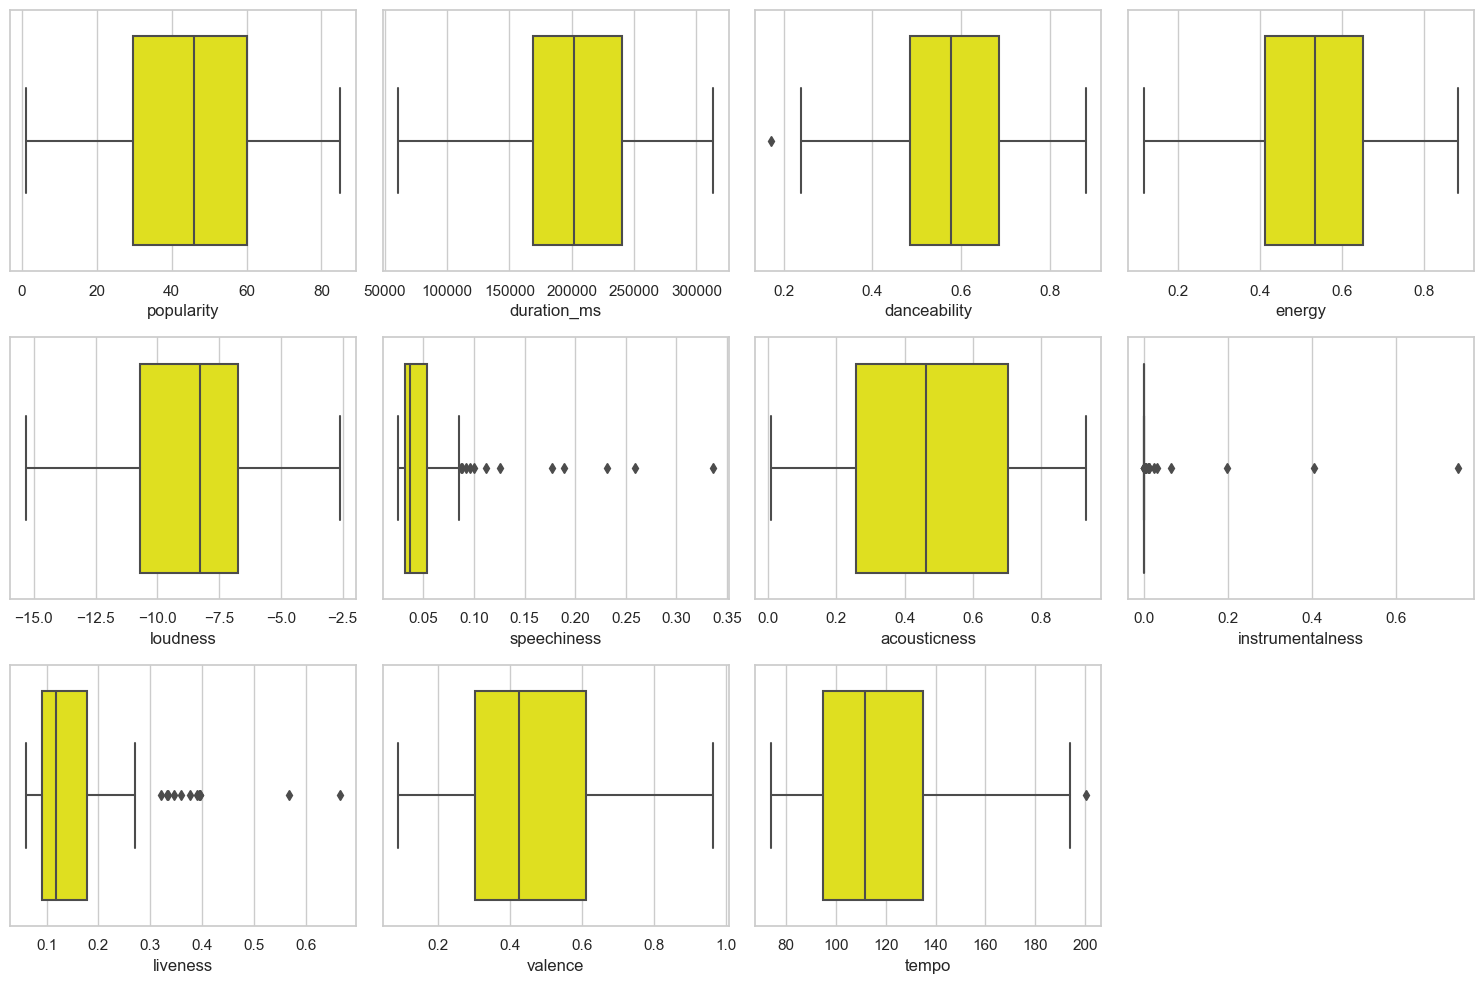

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the music track attributes

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create subplots for each numeric attribute
numeric_attributes = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_attributes, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=original_data[column], color='yellow')

plt.tight_layout()
plt.show()


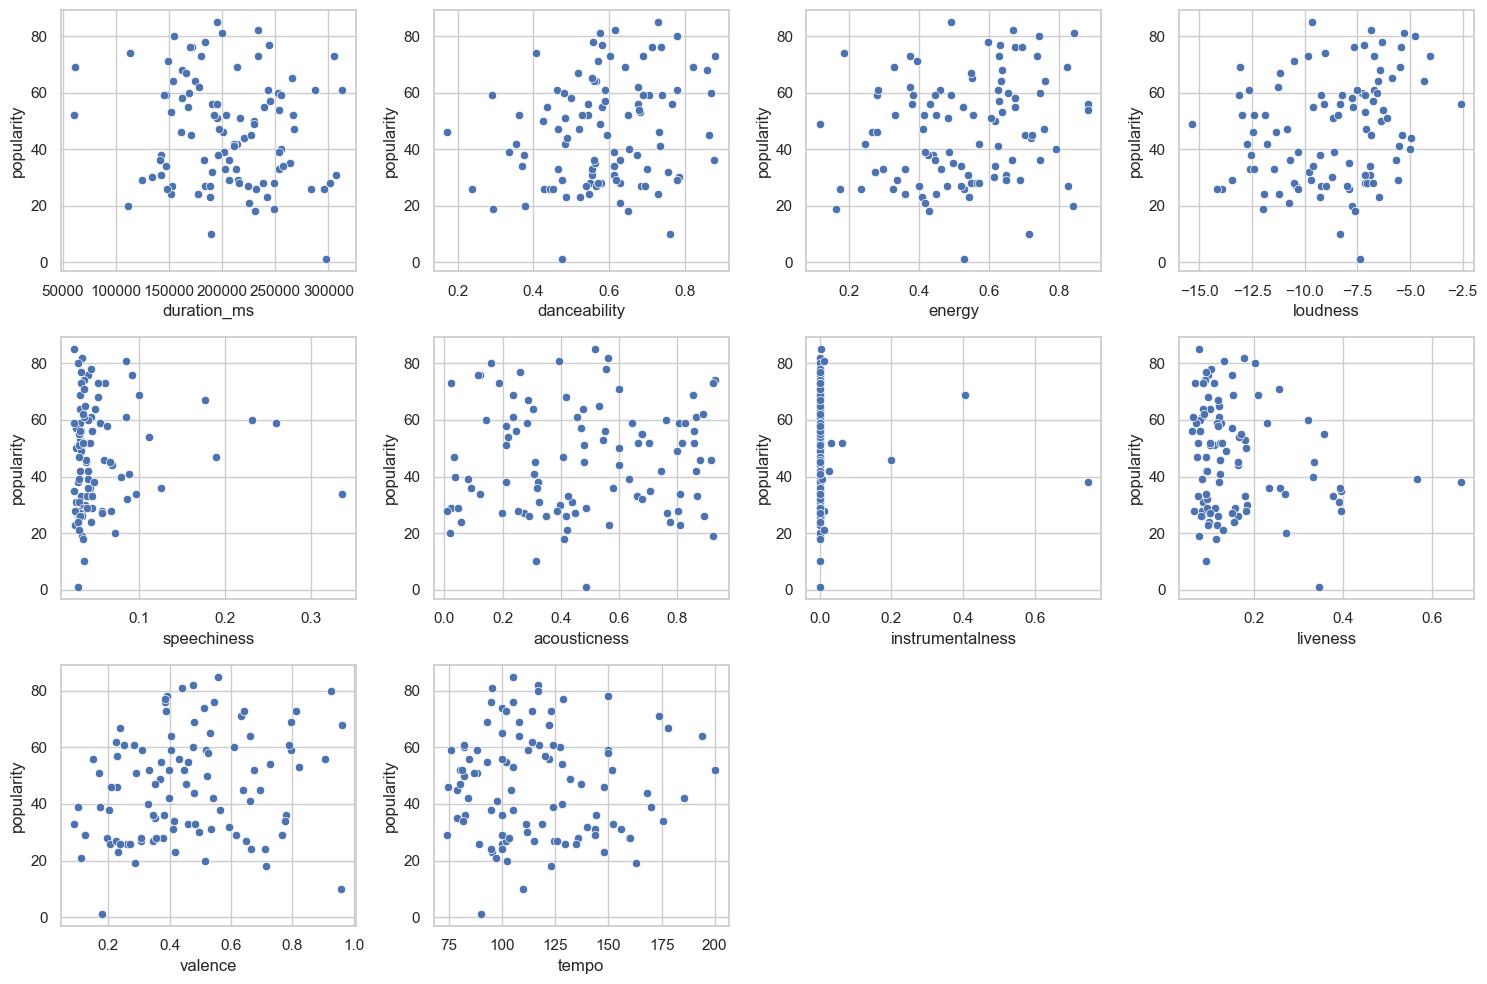

In [82]:
# Scatter plots for numeric attributes against 'popularity'
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_attributes[1:], 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=column, y='popularity', data=original_data)

plt.tight_layout()
plt.show()


In [83]:
df=original_data

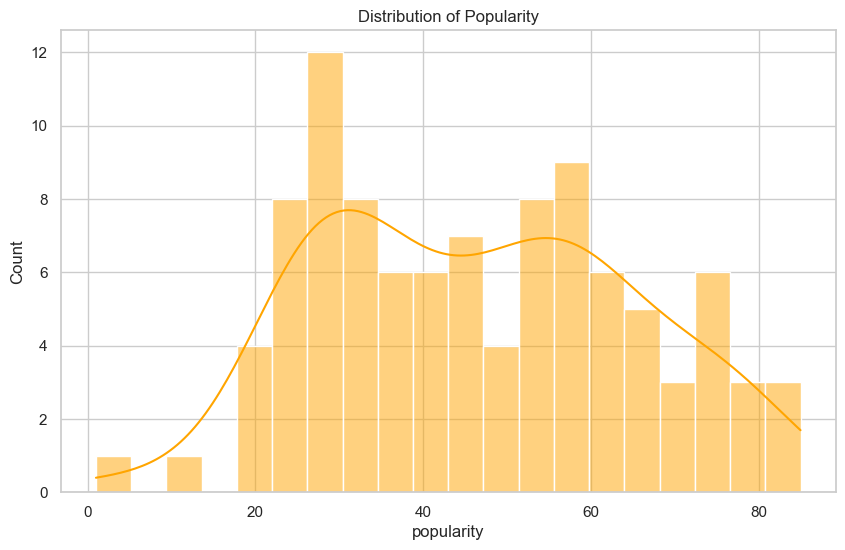

In [99]:
# Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20, kde=True, color='orange')
plt.title('Distribution of Popularity')
plt.show()

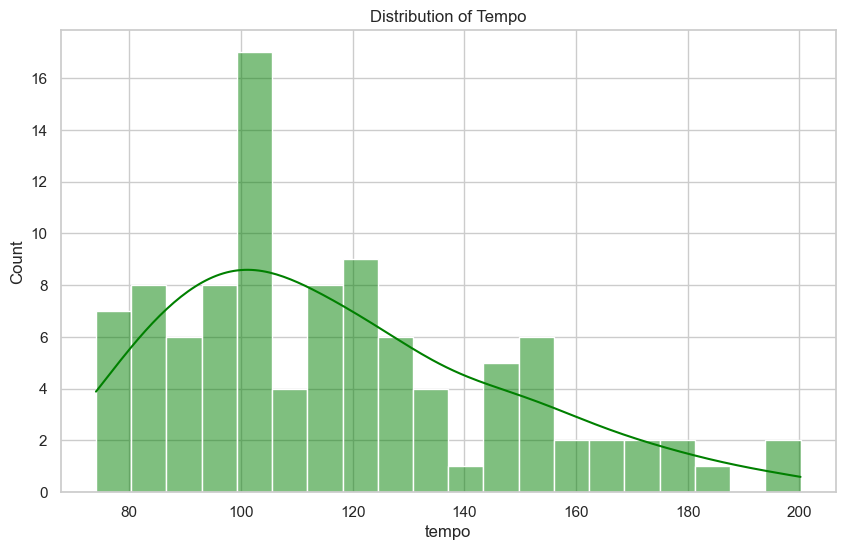

In [100]:

# Distribution of Tempo
plt.figure(figsize=(10, 6))
sns.histplot(df['tempo'], bins=20, kde=True, color='green')
plt.title('Distribution of Tempo')
plt.show()


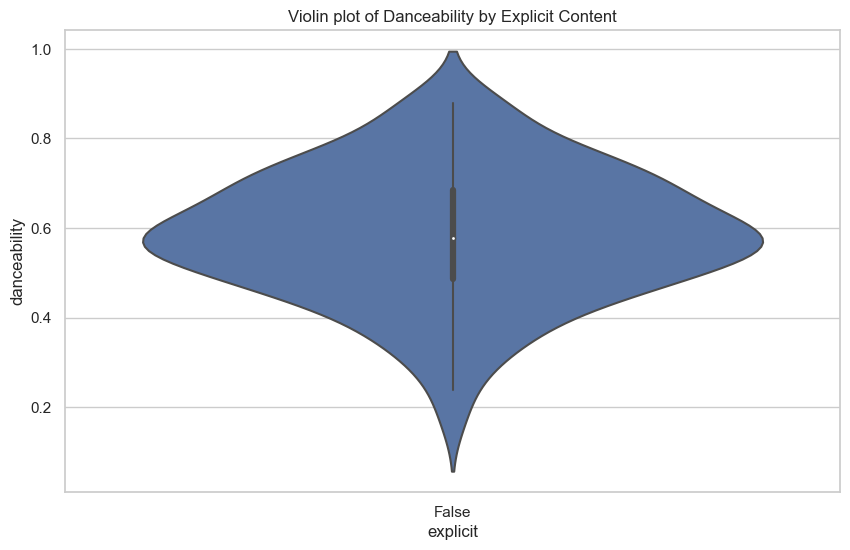

In [86]:

# Violin plot of Danceability by Explicit Content
plt.figure(figsize=(10, 6))
sns.violinplot(x='explicit', y='danceability', data=df)
plt.title('Violin plot of Danceability by Explicit Content')
plt.show()

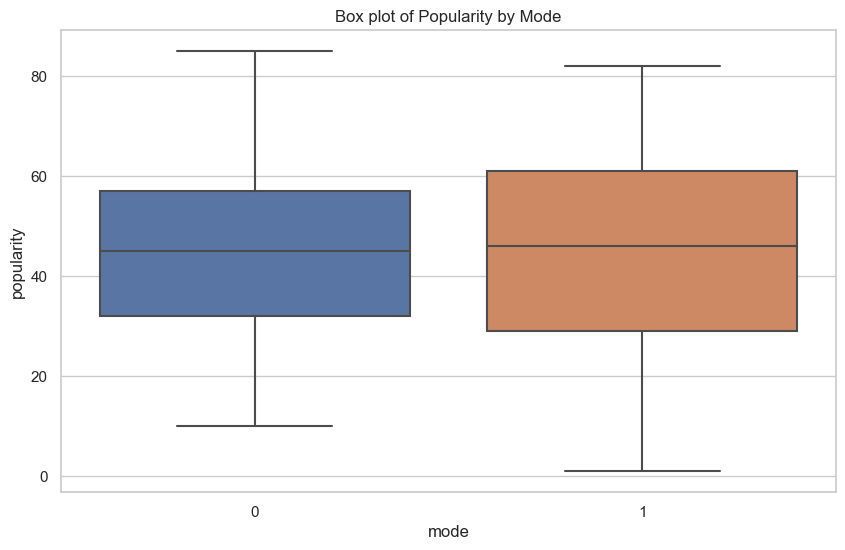

In [87]:

# Box plot of Popularity by Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='popularity', data=df)
plt.title('Box plot of Popularity by Mode')
plt.show()


/var/folders/v8/y5kz9bp15qq2b7x0svf7pmc00000gn/T/ipykernel_51860/1962923537.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


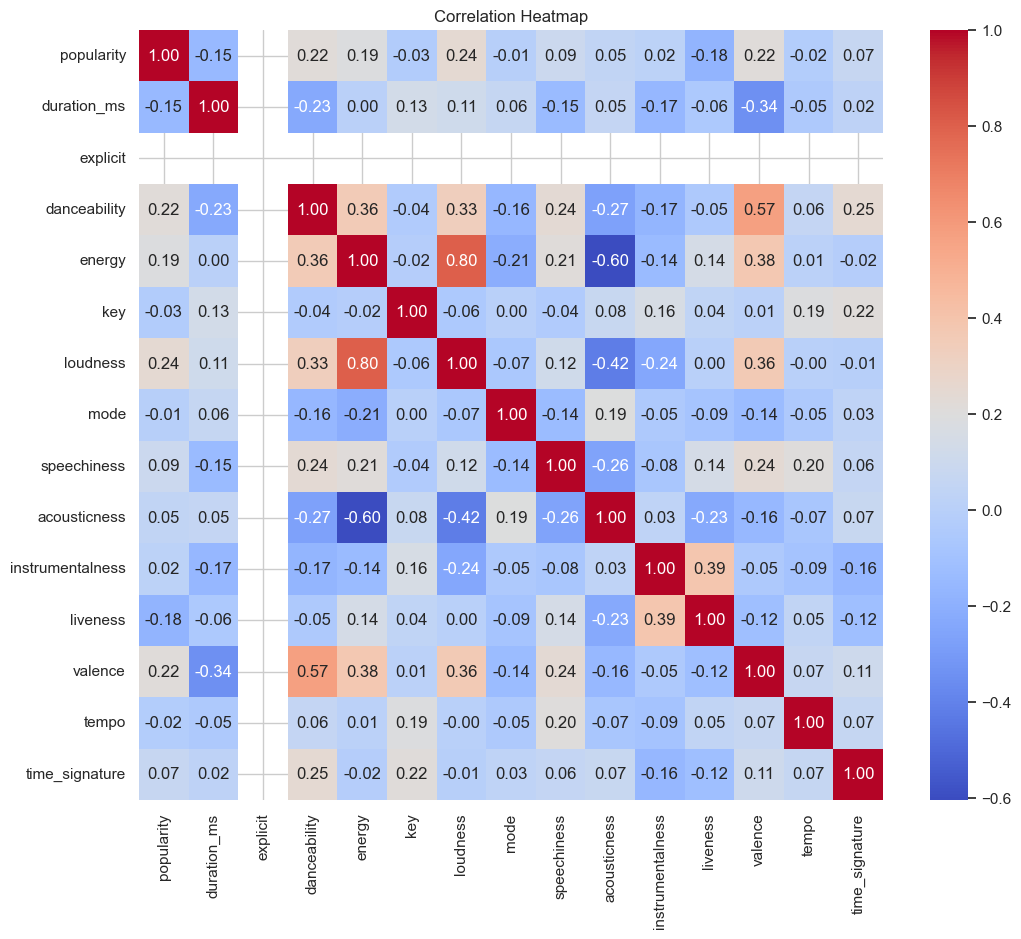

In [90]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

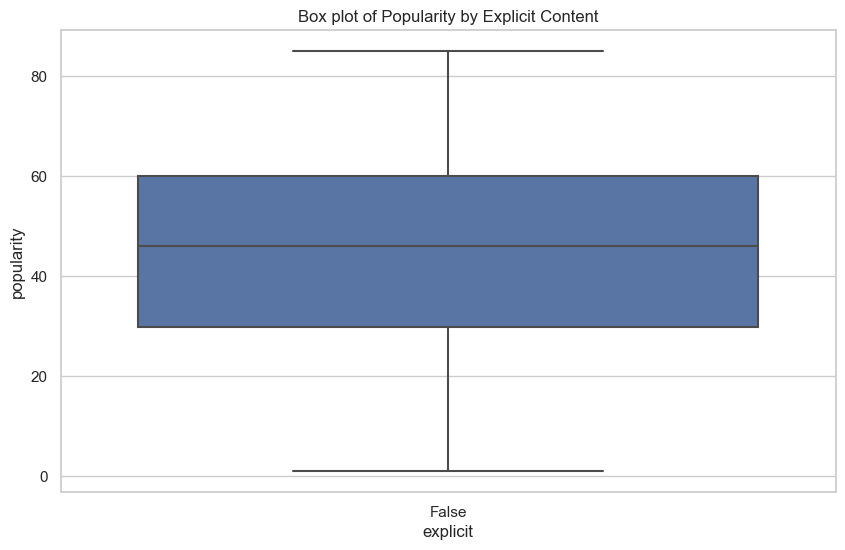

In [88]:

# Box plot of Popularity by Explicit Content
plt.figure(figsize=(10, 6))
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Box plot of Popularity by Explicit Content')
plt.show()

<Figure size 1500x1000 with 0 Axes>

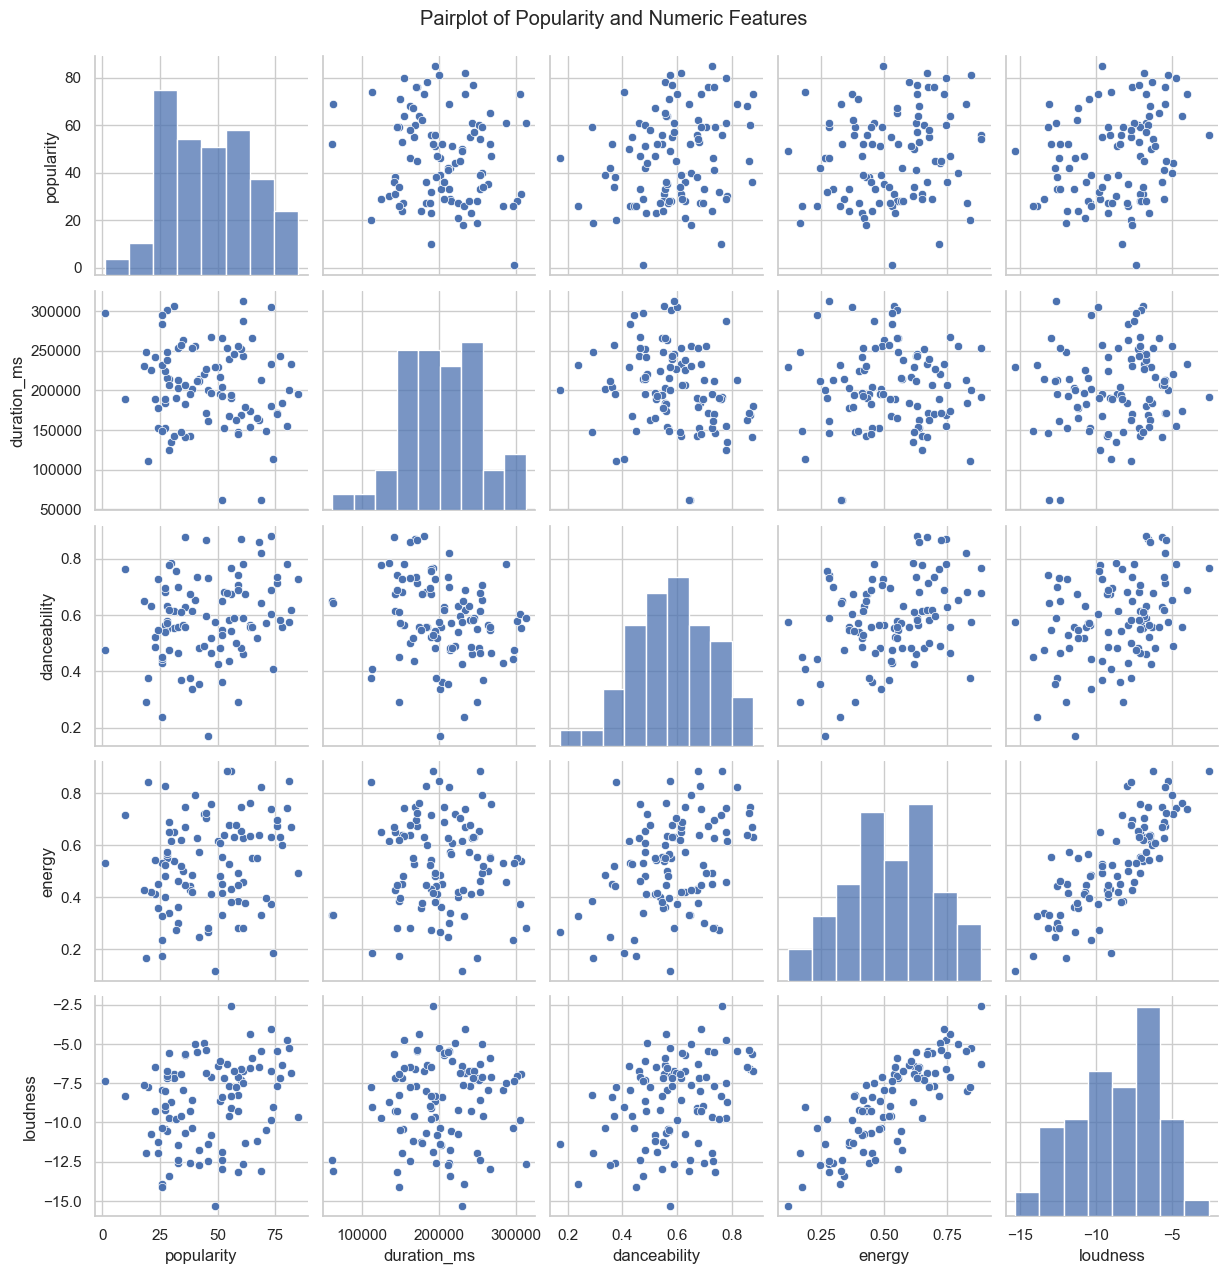

In [89]:
# Relationship between Popularity and Numeric Features
plt.figure(figsize=(15, 10))
sns.pairplot(df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness']])
plt.suptitle('Pairplot of Popularity and Numeric Features', y=1.02)
plt.show()